![alt text](img/LM.png)
# Kurs: Warsztaty Machine Learning w Pythonie

## Prowadzący: Piotr Ćwiakowski

## Autorzy: Piotr Ćwiakowski, Maciej Wilamowski

### Lekcja 3. Funkcja celu i ewaluacja

#### Spis treści:

1. Jak trenujemy algorytm?
2. Podstawowe funkcje straty
3. Ewaluacja modelu
4. Estymacja i ewaluacja modelu liniowego w Pythonie

# 1. Jak trenujemy algorytm?
Wiemy już, że naszym podstawowym celem będzie stworzenie estymatora $\hat{F}(X)$, który ma nam przybliżyć prawdziwą i nieobserwowalną bezpośrednio funkcję $F(X)$. Dla treningowego zbioru predykcje estymatora to $\hat{y}$, co do których w przypadku uczenia nadzorowanego wiemy, że prawdziwe wartości wynoszą $y$. W konsekwencji możemy stwierdzić jak duży błąd popełnia nasz estymator kiedy spojrzymy na błąd oszacowania $y-\hat{y}$.

Istnieje wiele różnych algorytmów znajdowania estymatora $\hat{F}(X)$. Każdy z nich to inne podejście, czy też przepis, reguły generowania $\hat{F}(X)$. Jednak niezależnie od tego w jaki dokładnie odtwarzamy poszukiwaną funkcję jedna zasada zawsze obowiązuje. Zawsze chcemy to zrobić w taki sposób, aby błąd oszacowania był jak najmniejszy.

Kierując się tym celem tworzymy pewną funkcję kosztu (ang. *cost function*) czy też straty (ang. *loss function*). Nazwy strata i koszt mogą kojarzyć się nam z błędem. Błąd oszacowania stanowi dla nas pewien koszt/stratę. Skoro zależy nam na tym, aby nasz estymator był jak najlepszy musimy dokonać optymalizacji. Optymalizacja to nic innego jak właśnie minimalizacja funkcji kosztu/straty. W przypadku poszczególnych algorytmów ML będziemy wykorzystywać różna algorytm optymalizacji, zarówno analityczne jak i numeryczne. Jednak zawsze optymalizowana będzie pewna funkcja kosztu.

# 2. Podstawowe funkcje kosztu

## 2.1. Średni błąd kwadratowy
Jedną z najczęściej wykorzystywanych funkcji straty jest średni błąd kwadratowy (ang. *mean squared error (MSE)*). Znany z ekonometrii, gdzie w podstawowej metodzie regresji wykorzystujemy metodę najmniejszych kwadratów (ang. *ordinary least squares (OLS)*).

$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2 $$

Powodem dla którego metoda ta jest tak często wykorzystywana jest fakt iż daje nam nieobciążony i efektywny estymator. W żadnym razie nie oznacza to jednak, że jest to "najlepsza" funkcja celu. Jedną z jej podstawowych i najważniejszych wad jest fakt iż "przywiązuje zbyt dużą wagę" wartościom odstającym (z ang. *outliers*).

## 2.2. Średni błąd absolutny
Rozwiązaniem problemu wartości odstających może być ich usunięcie lub wykorzystanie średniego błędu absolutnego jako funkcji kosztu.

$$MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y_i}| $$

Jednak również i ta funkcja nie jest pozbawiona wad. Przede wszystkim funkcja ta nie jest różniczkowalna w zerze.

## 2.3. Logloss

Przyjrzyjmy się więc najpopularniejszym funkcjom kosztu w klasyfikacji. W naszym zbiorze treningowym posiadać będziemy dyskretne etykiety (binarne lub wielomianowe). W regresji logitycznej znanej nam z ekonometrii wykorzystując metodę największej wiarygodności znajdowaliśmy optymalne prawdopodobieństwa. W praktyce naszym warunkiem minimalizacji było:

$$f^*_\text{Logistic}= \ln\left(\frac{p(1\mid x)}{1-p(1\mid x)}\right) = \ln\left(p(1\mid x)\right)-\ln\left(1-p(1\mid x)\right)$$

## 2.4. Cross entropy

Przyjrzymy się teraz wzorowi na entropię krzyżową (ang. *cross entropy*) w problemie binarnym, dla którego typowa funkcja kosztu będzie wyglądała następująco:

$$J = -\frac1n\sum_{i=1}^n\ \bigg[y_i  \log \hat y_i + (1 - y_i)  \log (1 - \hat y_i)\bigg]$$

Jak widać w problemie dyskretnym pierwszy lub drugi wyraz wewnętrznej sumy wynosić będzie zero gdy nasza obserwacja będzie równa 0 lub 1. W ten sposób dla pojedynczej obserwacji zostanie tylko $\log \hat y_i$ lub $\log (1 - \hat y_i)$ dzięki czemu nasz algorytm dla danego wiersza będzie starał się zbliżyć $\hat y_i$ możliwie blisko jedynki. W praktyce minimalizacji cross entropy jest tym samym co maksymalizacja funkcji wiarygodności. Co więcej bez problemu możemy uogólnić tę funkcję dla dowolnie wielu poziomów zmiennej objaśnianej.

$$J = - \frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{i,k} \log \hat y_{i,k}$$

W tym przypadku staramy się mieć największe prawdopodobieństwo dla tej klasy dla której etykieta wynosi 1, dla danej obserwacji pozostałe elementy w wierszu również wyniosą zero. Często spotykamy ten wzór również pod nazwą *multinominal logloss*.

Zaletą tego podejścia jest ciągłość funkcji kosztu.

## 3.5. Hinge loss

W powyższym przypadku wyniki zmieniają się w sposób ciągły niezależnie od tego czy nasz algorytm dokonuje akurat dobrych predykcji czy nie. Sprawa wygląda inaczej w przypadku funkcji hinge loss. Tutaj zakładamy, dla klasyfikacji binarnej, że zmienna objaśniana przyjmuje wartości -1 i 1. Wtedy dla jednej obserwacji:

$$l(y) = \max(0, 1-y \cdot \hat y)$$

Jak widać w tej sytuacji, kiedy nasz algorytm dobrze przewiduje etykietę dla danej obserwacji, strata wynosi zero. Właśnie ta funkcja straty jest wykorzystywana m.in w maszynie wektorów nośnych (z ang. *Support Vector Machine (SVM)*).

## 2.6. Znaczenie funkcji straty
W praktycznych zastosowaniach machine learningu nigdy nie należy zapominać o tym, po co trenujemy dany model. Jakie jest realne, czy też biznesowe znaczenie błędów oszacowań. Jakie znaczenie ma dla nas to, o ile się pomylimy. Czy dwukrotnie większy błąd oszacowania jest dla nas w rzeczywistości dwukrotnie kosztowniejszy? A może wręcz przeciwnie? Kiedy błąd oszacowania już jest duży przestaje to mieć znaczenie czy jest "bardzo duży"?

Można sobie wyobrazić nawet przypadek, w którym koszt naszych błędów jest asymetryczny. Przewidzenie zbyt dużej wartości jest znacznie kosztowniejsze niż zbyt małej (np. problemy związane z liczeniem zdolności kredytowej lub limitami wagi bagażu w podróżach lotniczych). Podobnie w problemie klasyfikacji możemy znaleźć się w sytuacji, w której koszt popełnienia błędu I rodzaju jest wyższy/niższy niż błędu II rodzaju. W takich sytuacji możliwe jest stworzenie własnej funkcji kosztu która uwzględni te asymetrię. Wykorzystywanie własnych, nietypowych funkcji celu wychodzi jednak poza zakres niniejszego kursu.

Podsumowując, tam gdzie to możliwe, zastosowana **funkcja kosztu powinna odzwierciedlać realny koszt błędu oszacowania**.

# 3. Ewaluacja modelu

## 3.1. Funkcje kosztu, a ewaluacja
Teoretycznie w większości algorytmów możliwe jest wykorzystanie niemalże dowolnej funkcji kosztu, choć nie zawsze zakończy się to sukcesem (np. ze względu na nieciągłość). W praktyce o ile nie uzasadania tego silna, realna potrzeba pozostajemy przy standardowych funkcjach kosztu, a naszą wiedzę o jakości dopasowania uzupełniamy stosując dodatkowe ewaluacje.

Ewaluacji dokonujemy po stworzeniu estymatora z wykorzystaniem wcześniej wybranej, zwykle innej funkcji kosztu. Wybrane funkcje ewaluacji nie wpływają więc **bezpośrednio na kształt estymatora $\hat{F}(X)$**. Funkcje ewaluacyjne nazywamy często również metrykami.

## 4.2. Ewaluacja problemu regresji

### 4.2.1. Przegląd metryk
W problemie regresji najczęściej mamy do czynienia z następującymi metrykami:
* MSE - Mean Square Error - średni błąd kwadratowy.

$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2 $$
* RMSE - Root Mean Square Error - pierwastek średniego błędu kwadratowowego.

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2} $$
* MAE - Mean Absolute Error - średni błąd absolutny.

$$MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y_i}| $$
* MedAE - Median Absolute Error - medianowy błąd absolutny - ta metryka jest najbardziej odporna na obserwacje odstające.

$$MedAE = median( |y_0 - \hat{y_0}| \dots |y_n - \hat{y_n}| )$$
* MAPE - Mean Absolute Percentage Error - średni procentowy błąd absolutny - ta metryka jest również odporna na obserwacje odstające, ale preferuje modele niedoszacowujące zmienną objaśnianą.

$$MAPE = \frac{1}{n}\sum_{i=1}^n \frac{|y_i - \hat{y_i}|}{y_i} $$
* MSLE - Mean Squared Logarithmic Error - średni błąd logarytmu kwadratów - jest to przykład metryki asymetrycznej, który przykłada relatywnie mniejszą wagę do większych błędów.

$$MSLE = \frac{1}{n}\sum_{i=1}^n (\log(1+y_i) - \log(1+\hat{y_i}))^2 $$
* RMSLE - Rooot Mean Squared Logarithmic Error - jak wyżej tylko wynik dodatkowo jest spierwiastkowany.

$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n (\log(1+y_i) - \log(1+\hat{y_i}))^2} $$
* $R^2$ - Coefficient of determination - współczynnik zmienności.

$$R^2 \equiv 1 - {RSS \over TSS}$$
gdzie:
$$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$$
$$RSS=\sum_i (y_i-\hat{y_i})^2$$
$$TSS=\sum_i (y_i-\bar{y})^2$$

W przypadku regresji interpretacja błędu oszacowania jest względnie prosta. Większość z nas intuicyjnie czuje co oznacza średni błąd lub średni błąd kwadratowy. W każdej chwili możemy przygotować sobie histogram błędów oszacowań, co pozwoli na bezpośrednie obejrzenie jakości oszacowania w naszej próbce treningowej.

### 4.2.2. Którą metrykę wybrać?

W tym zakresie nie ma bardzo sztywnych reguł, natomiast warto mieć na uwadze poniższe fakty:

* MAE w mniejszym stopniu jest wrażliwy na obserwacje odstające niż RMSE, 
* MAE jest łatwiejszy w interpretacji niż RMSE – jest to oczekiwane odchylenie od wartości prawdziwej.
* RMSE jest mimo to popularniejszy, ponieważ jest różniczkowalny i przez to często wykorzystywany jako funkcja straty.

**WNIOSEK: Jeśli mamy w próbie outliery, które mają po prostu duży błąd losowy, wybierzmy MAE. Jeśli mimo dużych różnic i tak musimy nauczyć się dobrze modelować obserwację odstające, wybierzmy RMSE.**

* MAPE – najłatwiejszy w interpretacji, intuicyjny. Sposób konstrukcji błędu sprawia, że błędy dla wszystkich wartości mają tą samą wagę (nie zawsze pożądana właściwość) i statystyka faworyzuje modele niedoszacowujące zmienną objaśnianą.
* RMSLE  ma następujące właściwości:
    * mniej wrażliwy na outliery
    * traktuje błędy relatywnie - błąd (10000,9000) taki sam jak dla (10, 9)
    * niedoszacowania traktuje gorzej niż przeszacowania: błąd (1000, 600) gorszy niż (1000, 1400) - por. rys. poniżej:
    
![](img/RMSE_1.png)

Przydatne linki:  
* https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0  
* https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4
* https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

Warto zdawać sobie sprawę również z poniższych faktów:

![](img/RMSE_2.png)
Żródło: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d![image.png]

![](img/RMSE_3.png)
Źródło: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

## 4.3. Ewaluacja problemu klasyfikacji 

### 4.3.1. Miary dyskretne
Tymczasem w problemie klasyfikacji trudniej jest nam bezpośrednio obejrzeć błąd oszacowania, szczególnie kiedy przez predykcje rozumiemy wytypowane wartości dyskretne. W takiej sytuacji pierwszą miarą, która przychodzi nam na myśl jest dokładność (ang. *accuracy*). Zobaczmy jak w praktyce mogą wyglądać nasze predykcje.

![CONFMATRIX](img/confMatrix2.png)
Źródło: http://www.ritchieng.com/machine-learning-evaluate-classification-model/

Oznaczenia:
$TP$ - true positive, $TN$ - True negatives, $FP$ - False postives, $FN$ - False negatives, $P$ - number of positives, $N$ - number of negatives

* Acc - Accuracy - Dokładność
$$ Acc = {(TP+TN) \over (P+N)}$$

Jak łatwo się domyślić nie jest to najlepsza miara. O ile w przypadku prób zbalansowanych jej wyniki można interpretować intuicyjnie, to przy próbach niezbalansowanych już nie. W przypadku,  w którym w naszym zbiorze jest 99 jedynek i jedno zero uzyskamy dokładność na poziomie 99% nawet jeżeli każdej obserwacji przypiszemy jedynkę. Miara dokładności jest więc zupełnie nieznormalizowana. Czemu na przeciw wychodzi zbalansowana dokładność.

* Bacc - Balanced Accuracy
$$ Bacc = ({TP \over P} + {TN \over N})/2$$

Kiedy spojrzymy na zera i jedynki osobno to łącznie uzyskamy już całkiem przejrzysty obraz. Obydwie miary mogą osiągnąć wartości od 0 do 1. Kiedy jedna z nich jest wysoka a druga niska od razu domyślamy się, że mamy problem z niezbalansowaną próbą.

* TPR - True Positive Rate - Sensitivity, Hit Rate, Recall - Wrażliwość
$$ TPR = {TP \over P} = {TP \over TP+FN}$$


* TNR (SPC) - True Negative Rate, Specificity - Specyficzność
$$TNR = {TN \over N} = {TN \over FP+TN}$$


Analogicznie naszym mianownikiem może stanowić łączna liczba predykcji dla danej grupy, a nie łączna liczba wartości w danej grupie jak powyżej.

* PPV - Positive Predictive Value, Precision - Precyzja
$$ PPV = {TP \over TP + FP}$$

* NPV - Negative Predictive Value 
$$ NPV = {TN \over TN+FN}$$

Możemy też czasem spotkać:
* F1 - f-score
$$F_1 = {2 \over {1 \over precision} + {1 \over recall}} = 2 * {(precision * recall) \over (precision + recall)}$$

Dobre podsumowanie miar przedstawia poniższy rysunek:
![measureMatrix](img/measuresMatrix.png)
Źródło: https://en.wikipedia.org/wiki/Confusion_matrix

### 4.3.2. Metryki dla prawdopodobieństw

Pomimo tego, że opisane powyżej funkcje kosztu stanowią podstawę w problemie optymalizacji, to zwykle nie wykorzystujemy ich jako metryk opisowych. Bez normalizacji trudno nam powiedzieć jak dobre dopasowanie uzyskamy dla danej wartości. Z tego powodu zwykle do oceny jakości dopasowania wykorzystuje się jedną z poniższych metryk.

### Funkcje kosztu jako metryki (logloss, hinge, cross entropy)

Kiedy analizujemy nasze predykcje jedynie z perspektywy przewidywanych poziomów zupełnie tracimy pewną bardzo istotną informację. Mianowicie to, jakie prawdopodobieństwo nasz algorytm przypisał danej obserwacji. Chyba wszystkie algorytmy klasyfikacji operując na funkcjach ciągłych przypisują prawdopodobieństwa pomiędzy 0 a 1. Dopiero w ostatnim kroku wybieramy poziom odcięcia, który pozwala nam zdecydować do której z kategorii powinniśmy przypisać daną obserwację. Dla jednej "1" przewidywane prawdopodobieństwo mogło wynieść 0.55, a dla innej 0.93. Można potocznie powiedzieć, że w drugim przypadku nasz algorytm był bardziej "pewny". Tymczasem operując na etykietach tracimy tę informację.

### ROC i AUC-ROC

**ROC - Receiver Operating Characteristic Curve** - krzywa ROC pozwala nam zobaczyć jak zmieniają się nasze wartości TPR i FPR (FPR = 1 - TNR) wraz ze wzrostem progu odcięcia. Jest to prawdopodobnie najwygodniejsze narzędzie do oceny jakości modeli w problemie klasyfikacji binarnej.

![ROC](img/roc.png)
Źródło: http://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

Jak widać, krzywa zawsze będzie przebiegać pomiędzy lewym dolnym rogiem kwadratu (TPR=0 i FPR=0) a prawym górnym (TPR=1 i FPR=1). Jednocześnie im lepszy model tym bliższy będzie jej przebieg do lewego górnego rogu (szybszy wzrost TPR przy jak najwolniejszym wzroście FPR). Początkowo dla progu odcięcia bliskiego 1 klasyfikujemy wszystkie wartości jako 0. Uzyskujemy oczywiście TNR = 1 (FPR  = 0). Wraz ze wzrostem progu odcięcia zwiększamy szansę na to, że pojawią się w naszych prognozach "1". Część z tych jedynek dobrze trafimy dzięki czemu TPR zaczyna rosnąć. Nasz klasyfikator najprawdopodobniej nie będzie idealny, więc część "1" powstanie niesłusznie, przez co rosnąć zacznie FPR (a TNR spadać). **Idealny klasyfikator będzie przebiegał zatem po krawędziach kwadratu przechodząc przez lewy górny róg.**

**AUC ROC - Area Under Curve** - Pole pod krzywą zwykle dotyczy krzywej ROC. Ta zmienna to całka pod krzywą, która przyjmuje wartości wartości od 0,5 (brak potencjału prognostycznego, losowy klasyfikator) do 1 (doskonały klasyfikator). W sytuacji w której chcemy opisać jakość modelu jedną liczbą jest to prawdopodobnie najlepsza miara dla klasyfikacji binarnej.

AUC można interpretować jako prawdopodobieństwo, że losowo wybrany element klasy pozytywnej otrzyma wyższą wartość score niż losowo wybrany element klasy negatywnej. AUC wykorzystujemy, żeby pokazać jak dobrze model sortuje prawdopodobieństwa, nie jest użyteczne jeśli zależy nam na kalibracji prawdopodobieństw.

### Precision/recall curve - AUC PR
Ostatnią miarą, która w ostatnich czasach zyskuje na popularności jest Average precision, czy też Precision/recall curve. Z jednej strony jest ona podobna/analogiczna do ROC. Korzystamy bowiem z tych samych punktów (uporzadkowanych prawdopodobieństw), jednak zamiast patrzeć na TPR i TNR , patrzymy na TPR (Recall) i PPV (Precision).
 
<img src="img/precRecallCurve.png" width="45%">
Źródło: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Krzywa precision-recall analizuje trade-off między PPV a TPR. Sprawdza zatem, jak spada czystość sygnału jak obniżamy cut-off. Zatem sprawdzamy, jaki jest koszt obniżenia jakości sygnału, kiedy chcemy wychwycić więcej TP. Dla krzywej można policzyć **PR AUC Score**, którą można interpretować jako przeciętną wartość precision dla cut-off <0, 1>.

W większości przypadków miary będą się zachowywać bardzo podobnie. W szczególnych przypadkach, np. silnie niezbalansowanej próby warto się jednak dobrze zastanowić nad tym, którą miarę stosować. Jak pokazują badania w takich warunkach korzystanie z miary AUC PR może być praktyczniejsze. Poniższy przykład pokazuje zachowanie dwóch algorytmów na zbiorze 20 "1" i 2000 "0". Wartości AUC ROC wynoszą odpowiednio 0.813 dla algroytmu I i 0.875 dla algorytmu II, a dla AUC PR odpowiednio 0.51 i 0.03.

<img src="img/ROCPRREC.png" width="65%">

Właściwości krzywej Precision-recall:

* łatwiej się intepretuje biznesowo niż ROC (łatwiej wybrać adekwatny biznesowo cut-off),
* bardziej niż ROC nadaje się do danych silnie niezbalansowanowanych,
* przydatna gdy bardziej interesuje nas Positive class, niż Negative Class.

Źródła: 
* Davis, J., & Goadrich, M. (2006, June). The relationship between Precision-Recall and ROC curves. In Proceedings of the 23rd international conference on Machine learning (pp. 233-240). ACM.
* https://towardsdatascience.com/the-ultimate-guide-to-binary-classification-metrics-c25c3627dd0a#9891![image.png](attachment:image.png)

### Krzywa gain
Krzywa GAIN (krzywa zysku) jest bardzo użyteczną wizualizacją bezpośrednich korzyści z zastosowania modelu predykcyjnego. Na osi X znajdują się kwantyle populacji posortowanych prawdopodobieństw (począwszy od najwyższych) a na osi Y procent jedynek/sukcesów znajdujących się w p% populacji najwyższych wartości dopasowanych.

![GAIN](img/gain1.png)
Źródło: Mariusz Gromada, Odczarowujemy modele predykcyjne, Millennium Bank, http://mathspace.pl/.

### Lift 
Wykres ten jest ściśle powiązany z AUC. Koncentruje się on jednak na względnej poprawie w stosunku do estymatora losowego. Zwykle ilustruje wartości dla kolejnych decyli. Pojedyncza wartość mówi o proporcji poprawnie przewidzianych jedynek przez nasz klasyfikator w stosunku do klasyfikatora losowego. Wartość 2.5 dla drugiego decyla oznacza, że kiedy wybraliśmy 20% wartości z najniższym prognozowanym prawdopodobieństwem znaleźliśmy aż 50% ze wszystkich jedynek (TPR = 0.5).

Wartości Lift możemy odczytać z wykresu ROC. Jest to proporcja wartości z naszej krzywej do wartości na przekątnej (estymatora losowego). Poniżej nieco dokładniejsza analiza krzywej:

![LIFT](img/lift1.png)
Źródło (legenda opracowanie własne): Mariusz Gromada, Odczarowujemy modele predykcyjne, Millennium Bank, http://mathspace.pl/

## 5. Estymacja i ewaluacja modelu liniowego w Pythonie
Podstawowym pakietem ekonometrycznym (nie machine learningowym) jest `statsmodels`. Biblioteka ta obsługuje większość powszechnie wykorzystywanych modeli ekonometrycznych. Jest to też najwygodniejszy pakiet do zadań ekonometrycznych, ze względu na łatwość formułowania specyfikacji modelu oraz podawanie informacji o wynikach modelu w typowy dla ekonometrii sposób (wraz z informacją o błędach oszacowań oraz wynikiem niektórych testów).

### 5.1. Przygotowanie środowiska pracy
W przypadku biblioteki `statsmodels` możemy definiować model bezpośrednio przez DataFrame (stosując funkcje algebry liniowej z `Numpya` w sposób bardziej charakterystyczny dla Pythona, czy też `sklearna` (podstawowego pakietu machine learningowego Pythona) oraz bardziej ekonometryczny (przez formuły). Poniżej pokażemy drugi ze sposobów, gdyż zwykle z niego będziemy korzystać pracując ze `statsmodels`.

In [1]:
import pandas as pd
import numpy as np
import pickle

# Konfiguracja ustawień graficznych
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

from IPython.display import display

# Wczytanie danych
housing = pd.read_csv("data/housing.csv", sep=",", header=None)
housing.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing.head()

# Zdefiniowanie listy zmiennych objaśniających (wszystkie oprócz MEDV, zmiennej objaśnianej)
features = housing.columns.tolist()
features.remove("MEDV")
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [2]:
# Obejrzyjmy histogram zmiennej objaśnianej
housing.MEDV.hist()
plt.show()

Zaimportujmy teraz `formula.api` ze `statsmodels`, a następnie uruchomimy model regresji liniowej na wszystkich zmiennych. Kiedy korzystamy z api formulas możemy wybierać zmienne przez wprowadzanie ich nazw, ale również łatwo możemy zapisać równanie przez umowne symbole - `~` to równa się, włączenie zmiennej to `+`, wyłączenie to `-`. Można również łatwo wprowadzać interakcje za pomocą operatorów `:` oraz `\*`, jak również łatwo można definiować zmienne jako nominalne (kategoryczne). Jest to notacja modeli, która nazywa się `patsy` i jest wykorzystywana w wielu pakietach ekonometrycznych (np. użytkownicy R powinni ją dobrze znać).

Co więcej `statsmodels` automatycznie zamieni dla nas zmienne kategoryczne na binarne za pomocą one hot encodingu (poziom bazowy zostanie wybrany alfabetycznie jako pierwszy z poziomów).

## 5.2. Oszacowanie modelu regresji liniowej w `statsmodels`
Przed przeprowadzeniem procedury przypomnijmy, jak działa metodą najmniejszych kwadratów (z ang. *Ordinary Least Squares*, OLS). Najprościej mówiąc, wyznacza w zbiorze funkcję liniową, która minimalizuje odległość wartości dopasowanych (znajdujących się na prostej) od wartości obserwowanych (zmiennej objaśnianej). W przestrzeni dwuwymiarowej (jeden X i jeden Y) rozwiązanie algortymu może wyglądać następująco:

<img src="img/OLS1.png" width="45%">  
Źródło: https://becominghuman.ai/understand-regression-performance-metrics-bdb0e7fcc1b3

Gdzie zielona linia to linia regresji, a linia czerwona to średnia w zbiorze. W ogólnym przypadku model można zapisać następująco:

<img src="img/OLS2.png" width="35%">  

Gdzie parametry $\beta_p$ są estymowane przez algorytm i interpretowane jako krańcowe efekty zmiennych, natomiast $X_p$ to zmienne z bazy danych.

In [3]:
# Import komponentu z biblioteki
import statsmodels.formula.api as smf

In [4]:
# Oszacowanie modelu
mod = smf.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data = housing)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        12:02:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Wykonajmy (dla przykładu) kilka bardziej skomplikowanych specyfikacji z wykorzystaniem składni `patsy`:

In [5]:
wzor = 'MEDV~' + '+'.join(features)
wzor

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [6]:
ex = smf.ols(formula=wzor, data = housing).fit().summary()
ex

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        12:02:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Model z interakcją
ex = smf.ols(formula = 'MEDV ~ CRIM*ZN', data = housing)
ex = ex.fit()
ex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     60.62
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.86e-33
Time:                        12:02:37   Log-Likelihood:                -1762.0
No. Observations:                 506   AIC:                             3532.
Df Residuals:                     502   BIC:                             3549.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0772      0.442     49.995      0.000      21.210      22.945
CRIM          -0.3372      0.042     -8.055      0.000      -0.419      -0.255
ZN             0.0816      0.017      4.776      0.000       0.048       0.115
CRIM:ZN        0.8066      0.173      4.673      0.000       0.468       1.146
==============================================================================
Omnibus:                      168.529   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.165
Skew:                           1.630   Prob(JB):                    2.96e-103
Kurtosis:                       6.430   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Model bez stałej:
ex = smf.ols(formula = 'MEDV ~ CRIM*ZN-1', data = housing)
ex = ex.fit()
ex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.374
Model:                            OLS   Adj. R-squared (uncentered):              0.371
Method:                 Least Squares   F-statistic:                              100.3
Date:                Sat, 04 Dec 2021   Prob (F-statistic):                    6.80e-51
Time:                        12:02:37   Log-Likelihood:                         -2214.5
No. Observations:                 506   AIC:                                      4435.
Df Residuals:                     503   BIC:                                      4448.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.5727      0.092      6.220      0.000       0.392       0.754
ZN             0.3659      0.039      9.303      0.000       0.289       0.443
CRIM:ZN        2.5145      0.413      6.084      0.000       1.703       3.327
==============================================================================
Omnibus:                       31.788   Durbin-Watson:                   0.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.665
Skew:                          -0.386   Prob(JB):                     4.07e-14
Kurtosis:                       4.526   Cond. No.                         12.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Na temat metod obiektu regresji możemy doczytać tutaj (następnie fit -> Regressionresults):  
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

Więcej o różnych typach regresji jest napisane np. tutaj:  
https://www.statsmodels.org/stable/regression.html

### Zapisywanie wyników regresji do pliku
Jedną z niewątpliwych zalet `statsmodels` jest możliwość eksportu wyników regresji do pliku. Możemy ją zapisać zarówno do pliku tekstowego jak również excela. `Statsmodels` posiada  dwie metody prezentowania podsumowania wyników modelu `summary` oraz `summary2`. Różnią się formatem danych wynikowych. W pierwszym przypadku mamy dane, które łatwo zapisać do pliku jako tekst  w natywnym obiekcie `statsmodels`, w drugm przypadku dane przechowywane są w formacie `pandasa`, co ułatwia eksport do excela.

In [9]:
# Stworzenie obiektów
summary = res.summary()
type(summary)

statsmodels.iolib.summary.Summary

In [10]:
print(type(summary.tables[0]))
print("Pierwsza część wyników")
display(summary.tables[0])

<class 'statsmodels.iolib.table.SimpleTable'>
Pierwsza część wyników


<class 'statsmodels.iolib.table.SimpleTable'>

In [11]:
print("Druga część wyników")
display(summary.tables[1])

Druga część wyników


<class 'statsmodels.iolib.table.SimpleTable'>

In [12]:
# Stworzenie folderu results
import os
os.mkdir('results')

# Zapisanie do pliku:
with open(f"results/regresja_housing.txt", "w") as fp:
    fp.write(str(summary))

FileExistsError: [WinError 183] Nie można utworzyć pliku, który już istnieje: 'results'

In [13]:
summary2 = res.summary2()
print(type(summary2.tables[0]))
print("Pierwsza część wyników")
display(summary2.tables[0])
print("Druga część wyników")
display(summary2.tables[1])
# Zapisanie do excela wyłącznie wyników  estymacji bez nagłówków
summary2.tables[1].to_excel(f"results/regresja_housing.xlsx")
# Zapisanie wyników do schowka (pod ctrl+c)
summary2.tables[1].to_clipboard()

<class 'pandas.core.frame.DataFrame'>
Pierwsza część wyników


0                 1                    2          3
0               Model:               OLS      Adj. R-squared:      0.734
1  Dependent Variable:              MEDV                 AIC:  3025.6086
2                Date:  2021-12-04 12:02                 BIC:  3084.7801
3    No. Observations:               506      Log-Likelihood:    -1498.8
4            Df Model:                13         F-statistic:      108.1
5        Df Residuals:               492  Prob (F-statistic):  6.72e-135
6           R-squared:             0.741               Scale:     22.518

Druga część wyników


Coef.  Std.Err.          t         P>|t|     [0.025     0.975]
Intercept  36.459488  5.103459   7.144074  3.283438e-12  26.432226  46.486751
CRIM       -0.108011  0.032865  -3.286517  1.086810e-03  -0.172584  -0.043438
ZN          0.046420  0.013727   3.381576  7.781097e-04   0.019449   0.073392
INDUS       0.020559  0.061496   0.334310  7.382881e-01  -0.100268   0.141385
CHAS        2.686734  0.861580   3.118381  1.925030e-03   0.993904   4.379563
NOX       -17.766611  3.819744  -4.651257  4.245644e-06 -25.271634 -10.261589
RM          3.809865  0.417925   9.116140  1.979441e-18   2.988727   4.631004
AGE         0.000692  0.013210   0.052402  9.582293e-01  -0.025262   0.026647
DIS        -1.475567  0.199455  -7.398004  6.013491e-13  -1.867455  -1.083679
RAD         0.306049  0.066346   4.612900  5.070529e-06   0.175692   0.436407
TAX        -0.012335  0.003761  -3.280009  1.111637e-03  -0.019723  -0.004946
PTRATIO    -0.952747  0.130827  -7.282511  1.308835e-12  -1.209795  -0.695699
B           0.009312  0.002686   3.466793  5.728592e-04   0.004034   0.014589
LSTAT      -0.524758  0.050715 -10.347146  7.776912e-23  -0.624404  -0.425113

## 5.3. Oszacowanie modelu regresji liniowej w `sklearn`
Przed chwilą zobaczyliśmy, jak uzyskać wyniki modelowania z pomocą `statsmodels`, gdzie specyfikację modelu podawaliśmy z pomocą formuły. Teraz zobaczymy jak zrobić to z pomocą Dataframe'ów z wykorzystaniem `sklearn`. `Sklearn` to podstawowy pakiet Pythona do machine learningu. 
 
Poniższy przykład dobrze pokazuje, że uniwersalne podejście do machine learningu nie jest najwygodniejsze, jeżeli chodzi o klasyczną ekonometrię. Nie dostajemy bowiem wszystkich wartości policzonych "na tacy". Musimy na przykład sami ręcznie wyliczyć np. $R^2$.

W żadnym razie nie oznacza to, że `sklearn` nie jest użyteczne. Wręcz przeciwnie, wystarczy spojrzeć na to, jak obszerna jest list zaimplementowanych algorytmów: http://scikit-learn.org/stable/user_guide.html. Potęgę tego pakietu zobaczymy w dalszej części kursu.

In [14]:
# Wczytanie modelu liniowego
from sklearn import linear_model

# Stworzenie obiektu z modelem liniowym
reg = linear_model.LinearRegression()

# Trening modelu
reg.fit(housing[features].values, housing["MEDV"].values)

# Zwrócenie współczynników
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [15]:
# Wygenerowanie i zwrócenie predykcji:
preds = reg.predict(housing[features].values)

# Wynik jest arrayem:
print(type(preds)) 

# Kilka pierwszych wartości
print(preds[0:10])

<class 'numpy.ndarray'>
[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]


Jak widać dostaliśmy takie same oszacowania parametrów jak w przypadku `statsmodels`. Nie dostaliśmy za to ładnie zaprezentowanych wyników i automatycznie policzonych statystyk. Musimy wszystko policzyć ręcznie i samodzielnie. No, nie do końca sami. Z pomocą podmodułu `metrics` z pakietu `sklearn`.

In [16]:
# import modułu metrics
import sklearn.metrics as metrics

preds = reg.predict(housing[features])
print("R^2: %.2f" % metrics.r2_score(housing["MEDV"], preds))
print("Mean squared error: %.2f" % metrics.mean_squared_error(housing["MEDV"], preds))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(housing["MEDV"], preds)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(housing["MEDV"], preds))

R^2: 0.74
Mean squared error: 21.89
Root mean squared error: 4.68
Mean absolute error: 3.27


C:\Users\pcwia\miniconda3\envs\ds\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


W bibliotece nie ma niestety MAPE, musimy sami napisać odpowiednią funkcję:

In [17]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean absolute error: %.2f" % mape(housing["MEDV"], preds))

Mean absolute error: 16.42


Średnio mylimy się o 16,42%. Zobaczmy czy uda się również policzyć błąd zlogarytmowany.

In [18]:
try:
    print("Mean squared log error: %.2f" % metrics.mean_squared_log_error(housing["MEDV"], preds))
except:
    print("Nie udało się")

Nie udało się


Najprawdopodobniej w predykcjach znajdują się wartości ujemne.

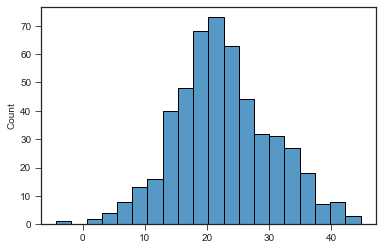

DescribeResult(nobs=506, minmax=(-4.281310709184851, 44.67308338731341), mean=22.532806324110677, variance=62.64853631101991, skewness=0.11071842432057091, kurtosis=0.10343116979610922)

In [19]:
import seaborn as sn
from scipy import stats

sn.histplot(preds)
plt.show()
stats.describe(preds)

Poprawmy wartości ujemne na zero.

In [20]:
preds[preds<0] = 0

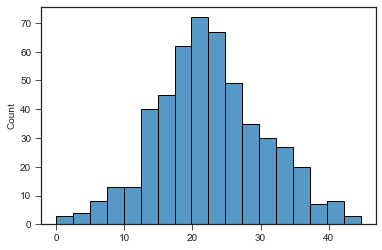

In [21]:
sn.histplot(preds)
plt.show()

Teraz błąd się już policzy.

In [22]:
print("Mean squared log error: %.2f" % metrics.mean_squared_log_error(housing["MEDV"], preds))

Mean squared log error: 0.07


## 5.4. Oszacowanie modelu regresji logistycznej w `statsmodels`
Regresję logistyczną możemy przećwiczyć na naszym głównym zbiorze danych. Podobnie jak w przypadku regresji liniowej, nim przejdziemy do praktyki, przypomnijmy/wprowadźmy odrobinę informacji teoretycznych - nie za wiele, nie będzie nam potrzebna ani w dalszej częsci kursu ani nie jest to też często spotykany model w uczeniu maszynowym, choć często wykorzystywany przez ekonometryków, np. w modelowaniu ryzyka kredytowego. 

Regresja logistyczna, wykorzystuje tzw. Metodę Najwiekszej Wiarygodności (MNW) do dopasowania dystrybuanty rozkładu logistycznego do rozkładu zmiennej binarnej, której wartości chcemy wytłumaczyć pewnym zbiorem cech obserwowalnych (X). W przestrzeni dwuwymiarowej rozwiązanie można przedstawić następująco:

<img src="img/logit1.png" width="45%">  

Można zauważyć, że jednym z najważniejszych atutów tego podejścia jest to, że wartości dopasowane są zawsze z przedział (0, 1) dzięki czemu można interpretować je jako prawdopodobieństwo zajścia zdarzenia kodowanego i obserwowanego jako 1 (wystąpienie zjawiska) lub 0 (brak zjawiska). Formalnie, forma funkcyjna modelu wygląda następująco:

<img src="img/logit2.png" width="35%">  

Zauważmy, że z postaci modelu wynika, że nie można interpretować bezpośrednio parametrów jako efekty krańcowe. Można jedynie interpretować je co do znaków (dodatnie oznaczają pozytywną korelację zmienną ze zjawiskiem, negatywne ujemną). Model nazywany jest uogólnionym modelem liniowym (z ang. *generalized linear model*, GLM), co można pokazać, zapisując funkcje związku (tzw. *link function*), która pokazuje liniową zależność między zmienną objaśnianą a parametrami modelu:

<img src="img/logit3.png" width="35%">  

In [23]:
# Wczytanie danych
df = pd.read_csv("data/bank-balanced.csv")
print(df.shape)
# Zwiększymy liczbę wyświetlanych kolumn, żeby zobaczyć całość
pd.set_option("display.max_columns",50)
df.head()

(11162, 17)


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [24]:
# Zapisanie listy zmiennych objaśniających:
features = df.columns.tolist()
features.remove('deposit')

In [25]:
# Stwórzmy sprytnie formułę na prawą stronę równania:
rhs = "+".join(features)

### Statsmodels formula bezpośrednio
Żeby skorzystać z możliwości definiowania modelu przez formułę nie musimy importować `api formula`. Możemy skorzystać bezpośrednio z podstawowych modułów `statsmodels` i po prostu skorzystać z metody `from_formula`. Przy tej okazji warto zobaczyć jak mocno powiązany jest ze sobą model regresji liniowej z regresją logistyczną. Są to w zasadzie te same modele, jeżeli chodzi o matematykę, z tą różnicą że w przypadku regresji logistycznej dodana jest na końcu transoformacja logistyczna. Znajduje to swoje odwzorowanie w sposobie wywołania w `statsmodels`. Skorzystamy z modułu GLM (z ang. *generalized linear model*), gdzie jako rodzina wybrany zostanie rozkład dwumianowy (z ang. *binominal*) modelowany domyślnie przez rozkład logistyczny.

In [26]:
import statsmodels.api as sm

In [27]:
# Stworzenie i oszacowanie modelu
mod = sm.GLM.from_formula(formula = "deposit ~ " + rhs, # wzór estymowanego równania
                          data = df, # zbiór danych
                          family = sm.families.Binomial()) # wybór rodziny rozkładu
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                        
===========================================================================================
Dep. Variable:     ['deposit[no]', 'deposit[yes]']   No. Observations:                11162
Model:                                         GLM   Df Residuals:                    11119
Model Family:                             Binomial   Df Model:                           42
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -4555.3
Date:                             Sat, 04 Dec 2021   Deviance:                       9110.7
Time:                                     12:03:05   Pearson chi2:                 6.38e+07
No. Iterations:                                  6   Pseudo R-squ. (CS):             0.4330
Covariance Type:                         nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.7870      0.269      2.931      0.003       0.261       1.313
job[T.blue-collar]         0.3314      0.104      3.178      0.001       0.127       0.536
job[T.entrepreneur]        0.3955      0.176      2.244      0.025       0.050       0.741
job[T.housemaid]           0.4757      0.191      2.489      0.013       0.101       0.850
job[T.management]          0.2683      0.108      2.496      0.013       0.058       0.479
job[T.retired]            -0.2972      0.147     -2.017      0.044      -0.586      -0.008
job[T.self-employed]       0.4298      0.162      2.657      0.008       0.113       0.747
job[T.services]            0.2835      0.121      2.352      0.019       0.047       0.520
job[T.student]            -0.5907      0.176     -3.351      0.001      -0.936      -0.245
job[T.technician]          0.1567      0.099      1.577      0.115      -0.038       0.351
job[T.unemployed]          0.1169      0.167      0.698      0.485      -0.211       0.445
job[T.unknown]             0.3942      0.345      1.144      0.253      -0.281       1.070
marital[T.married]         0.1800      0.086      2.101      0.036       0.012       0.348
marital[T.single]         -0.0767      0.099     -0.778      0.436      -0.270       0.116
education[T.secondary]    -0.2053      0.093     -2.212      0.027      -0.387      -0.023
education[T.tertiary]     -0.4631      0.109     -4.236      0.000      -0.677      -0.249
education[T.unknown]      -0.2640      0.151     -1.753      0.080      -0.559       0.031
default[T.yes]             0.0085      0.222      0.038      0.970      -0.426       0.443
housing[T.yes]             0.7001      0.062     11.260      0.000       0.578       0.822
loan[T.yes]                0.5019      0.084      5.988      0.000       0.338       0.666
contact[T.telephone]       0.0533      0.108      0.494      0.622      -0.158       0.265
contact[T.unknown]         1.5552      0.097     16.090      0.000       1.366       1.745
month[T.aug]               0.8185      0.111      7.377      0.000       0.601       1.036
month[T.dec]              -1.3732      0.371     -3.705      0.000      -2.100      -0.647
month[T.feb]               0.1675      0.128      1.311      0.190      -0.083       0.418
month[T.jan]               1.2391      0.167      7.414      0.000       0.912       1.567
month[T.jul]               0.9824      0.112      8.753      0.000       0.762       1.202
month[T.jun]              -0.2854      0.133     -2.150      0.032      -0.546      -0.025
month[T.mar]              -2.0295      0.229     -8.868      0.000      -2.478      -1.581
month[T.may]               0

Na powyższym wydruku widzimy od razu, że zmienne nominalne zostały rozkodowane, a dla każdego z poziomów oprócz bazowego stworzona została kolumna zawierająca wartość 1, tylko tam gdzie zmienna przyjmuje dany poziom. Na wydruku odnotowano to w nawiasach kwadratowych [T.]

W sytuacji, w której z otrzymanymi prawdopodobieństwami chcielibyśmy zrobić coś więcej (zapisać do porównania, otrzymać prognozy, policzyć metryki) musimy wygenerować wartości dopasowane/prognozowane metodą `predict` (jeżeli nie podamy żadnego argumentu prognoza zostanie zrobiona na zbiorze treningowym). Kiedy mamy już prawdopodobieństwa możemy, przy zastosowaniu progu odcięcia, dokonać prognozy i zbudować tabelę *confusion matrix*.

In [28]:
# Wygenerowanie wartości dopasowane/prognozowane i stwórzmy klasy na podstawie punktu odcięcia 0.5
probs = res.predict()
cutoff = 0.5
# zauważmy, że modelowane jest domyślnie prawdopodobieństwo "No", więc trzeba odpowiednio 
# rekodować klasy, żeby 1 intuicyjnie oznaczało "Yes"
preds = pd.Series(['yes' if x < cutoff else 'no' for x in probs], name = 'preds')

In [29]:
# Stwórzmy i Wyświetlmy tabelę kontyngencji
display(pd.crosstab(df.deposit, preds))
display(pd.crosstab(df.deposit, preds, normalize=True).round(3))
display(pd.crosstab(df.deposit, preds, normalize=True, margins=True).round(3))

preds      no   yes
deposit            
no       5021   852
yes      1074  4215

preds       no    yes
deposit              
no       0.450  0.076
yes      0.096  0.378

preds       no    yes    All
deposit                     
no       0.450  0.076  0.526
yes      0.096  0.378  0.474
All      0.546  0.454  1.000

## 5.4. Policzenie AUC ROC, PR Curve oraz Gain Curve w `sklearn`

Aby dokończyć wstępną ocenę naszego modelu przygotujmy teraz krzywą ROC oraz PR. Obydwie funkcje są wbudowane w `sklearna`, ale nie bezpośrednio, musimy policzyć punkty konieczne do rysowania krzywej, a w drugiej kolejności przygotować rysunek. W tej chwili podejście to może się wydawać niepotrzebnie pracochłonne, ale jak zobaczymy później w ten sposób, gdy mamy pełną kontrolę nad procesem, możemy samodzielnie przygotować dowolną funkcję rysującą te krzywe i kontrolować zarówno stylistykę, dodatkowe informacje jak i liczbę serii danych na wykresie.

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obliczenie punktów potrzebnych do narysowania krzywej ROC
# funkcja roc_curve zwraca trzy serie danych, fpr, tpr oraz poziomy progów odcięcia
fpr, tpr, thresholds = roc_curve((df.deposit=="no").astype(int), probs)

In [31]:
# Obliczamy pole powierzchni pod krzywą
rocScore = roc_auc_score((df.deposit=="no").astype(int), probs)
rocScore = round(rocScore, 3)
rocScore

0.905

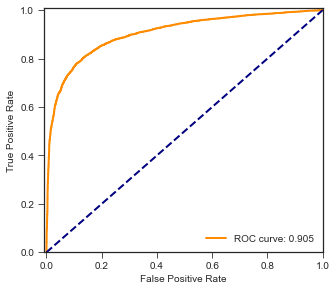

In [32]:
# Ustalanie wielkości rysunku
fig, ax = plt.subplots(figsize=(5,4.5))

# Rysujemy krzywą ROC
ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve: {rocScore}')

# Rysujemy krzywą 45 stopni jako punkt odniesienia
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
ax.set_xlim([-0.01, 1.0])
ax.set_ylim([0.0, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
plt.show()

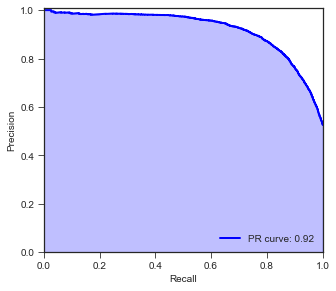

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Liczymy punkty potrzebne do narysowania krzywej
precision, recall, thresholds = precision_recall_curve((df.deposit=="no").astype(int), probs)

# Obliczamy pole powierzchni pod krzywą
average_precision = average_precision_score((df.deposit=="no").astype(int), probs)
average_precision = round(average_precision, 2)

# Ustalanie wielkości rysunku
fig, ax = plt.subplots(figsize=(5,4.5))

# Rysujemy krzywą ROC
ax.plot(recall, precision, color='b', lw=2, label=f'PR curve: {average_precision}')

# Rysujemy krzywą 45 stopni jako punkt odniesienia
ax.fill_between(recall, precision, step='post', alpha=0.25, color='b')

# Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower right")
plt.show()

W przypadku Precision-Recall Curve, pamiętajmy, że przebiega ona inaczej w zależności czy liczymy je dla "1" czy "0". Żeby policzyć analogiczną krzywą, wykorzystamy regresję logistyczną z scikit-learn:

In [36]:
# Przygotowanie danych (dane nie mogą zawierać zmiennych innych niż numeryczne):
df2 = df.copy()
df2.deposit = [1 if x == 'yes' else 0 for x in df2.deposit]
df2 = pd.get_dummies(df2, columns = df2.select_dtypes('object').columns.tolist())
features = df2.columns.tolist()
features.remove('deposit')
df2.head()

age  balance  day  duration  campaign  pdays  previous  deposit  \
0   59     2343    5      1042         1     -1         0        1   
1   56       45    5      1467         1     -1         0        1   
2   41     1270    5      1389         1     -1         0        1   
3   55     2476    5       579         1     -1         0        1   
4   54      184    5       673         2     -1         0        1   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           1                0                 0              0   
1           1                0                 0              0   
2           0                0                 0              0   
3           0                0                 0              0   
4           1                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             1            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               0               0            0                 0   
2               1               0            0                 0   
3               0               0            0                 0   
4               0               0            0                 0   

   marital_married  marital_single  education_primary  education_secondary  \
0                1               0                  0                    1   
1                1               0                  0                    1   
2                1               0                  0                    1   
3                1               0                  0                    1   
4                1               0                  0                    0   

   ...  default_no  default_yes  housing_no  housing_yes  loan_no  loan_yes  \
0  ...           1            0           0            1        1         0   
1  ...           1            0           1            0        1         0   
2  ...           1            0           0            1        1         0   
3  ...           1            0           0            1        1         0   
4  ...           1            0           1            0        1         0   

   contact_cellular  contact_telephone  contact_unknown  month_apr  month_aug  \
0                 0                  0                1          0          0   
1                 0                  0                1          0          0   
2                 0                  0                1          0          0   
3                 0                  0                1          0          0   
4                 0                  0                1          0          0   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0          1          0          0          0                 0   
1          1          0          0          0                 0   
2          1          0          0          0                 0   
3          1          0          0          0                 0   
4          1          0          0          0                 0   

   poutcome_other  poutcome_

In [38]:
# Wczytanie modelu liniowego
from sklearn.linear_model import LogisticRegression
 
# Stworzenie obiektu z modelem liniowym
reg = LogisticRegression(solver = 'liblinear')
 
# Trening modelu
reg.fit(df2[features].values, df2['deposit'].values, )
 
# Zwrócenie współczynników
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[-2.30805457e-03  2.79603381e-05  1.66754891e-03  5.45639352e-03
  -9.10866485e-02 -1.27864920e-04  1.75842109e-02  1.20537972e-01
  -2.34657906e-01 -2.64691083e-01 -2.79839564e-01 -1.40749762e-01
   4.65443262e-01 -3.02066835e-01 -1.76744120e-01  6.31083848e-01
  -4.75031908e-02 -1.26823281e-02 -1.01269089e-01 -8.09572044e-02
  -2.56689389e-01 -5.49220247e-03 -3.29236746e-01 -9.94728894e-02
   1.39011996e-01 -5.34411568e-02 -1.63255364e-01 -1.79883432e-01
   1.86633563e-01 -5.29772359e-01  1.08642578e-01 -4.51781374e-01
   4.21415148e-01  3.80566088e-01 -1.14512003e+00  1.30969521e-02
  -8.11841466e-01  5.34422525e-01 -1.76718939e-01 -1.04869232e+00
  -9.73902995e-01  2.80752338e-01  1.57545754e+00 -6.63697964e-01
  -9.37758795e-01  1.05824404e+00  8.07500295e-01 -5.85518010e-01
  -4.98723152e-01  1.61794529e+00 -8.76842920e-01]]


In [40]:
probs = reg.predict_proba(df2[features].values)
# The returned estimates for all classes are ordered by the label of classes.
# To znaczy, że pierwsza kolumna jest dla klasy 0, druga dla 1, itd. ...
probs[:10]

array([[0.15663683, 0.84336317],
       [0.00936365, 0.99063635],
       [0.03166584, 0.96833416],
       [0.75531693, 0.24468307],
       [0.38106352, 0.61893648],
       [0.79979148, 0.20020852],
       [0.126298  , 0.873702  ],
       [0.11029658, 0.88970342],
       [0.70384738, 0.29615262],
       [0.04757907, 0.95242093]])

In [42]:
rocScore = roc_auc_score(df2.deposit, probs[:,1])
rocScore = round(rocScore, 3)
rocScore

0.904

In [43]:
average_precisionYes = average_precision_score(df2.deposit, probs[:, 1])
average_precisionYes = round(average_precisionYes, 2)
average_precisionYes

0.87

In [44]:
average_precisionNo = average_precision_score((df2.deposit == 0).astype(int), probs[:, 0])
average_precisionNo = round(average_precisionNo, 2)
average_precisionNo

0.92

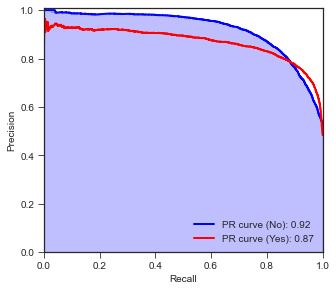

In [49]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Liczymy punkty potrzebne do narysowania krzywej
precisionNo, recallNo, thresholdsNo = precision_recall_curve((df2.deposit == 0).astype(int), probs[:, 0])
precisionYes, recallYes, thresholdsYes = precision_recall_curve(df2.deposit, probs[:, 1])

# Ustalanie wielkości rysunku
fig, ax = plt.subplots(figsize=(5,4.5))

# Rysujemy krzywą ROC
ax.plot(recallNo, precisionNo, color='b', lw=2, label=f'PR curve (No): {average_precisionNo}')
ax.plot(recallYes, precisionYes, color='r', lw=2, label=f'PR curve (Yes): {average_precisionYes}')

# Rysujemy krzywą 45 stopni jako punkt odniesienia
ax.fill_between(recall, precision, step='post', alpha=0.25, color='b')

# Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower right")
plt.show()

Na koniec policzmy jeszcze gain curve:

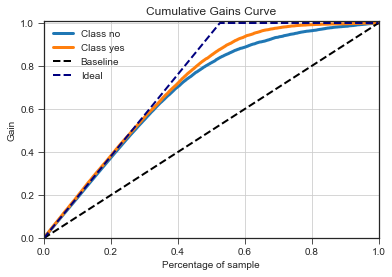

In [47]:
import scikitplot as skplt

df.deposit.value_counts(normalize=True)

skplt.metrics.plot_cumulative_gain(df.deposit, probs)
plt.plot([0, 0.52616, 1], [0, 1, 1], color='navy', lw=2, linestyle='--', label = 'Ideal')
plt.xlim([0, 1])
plt.ylim([0.0, 1.01])
plt.legend()

Poniżej jeszcze wersja dla `probs` otrzymane ze `statsmodels`: 

In [46]:
# import scikitplot as skplt

# probs2 = np.transpose(np.vstack([1 - probs, probs]))

# df.deposit.value_counts(normalize=True)

# skplt.metrics.plot_cumulative_gain((df.deposit=="no").astype(int), probs2)
# plt.plot([0, 0.52616, 1], [0, 1, 1], color='navy', lw=2, linestyle='--', label = 'Ideal')
# plt.xlim([0, 1])
# plt.ylim([0.0, 1.01])
# plt.legend()

Widzimy już, jak łatwo możemy przygotować model i policzyć niemalże dowolną metrykę. Czy wystarczy już teraz tylko tak długo zmieniać specyfikację modelu aż uzyskamy możliwie najlepsze wyniki metryk? Czy będzie to poprawna ocena modelu?